### Task 03:

In this task, you have to implement the Backpropagation method using Pytorch. This is particularly useful when the hypothesis function contains several weights.

**Backpropagation**: Algorithm to caculate gradient for all the weights in the network with several weights. 

* It uses the `Chain Rule` to calcuate the gradient for multiple nodes at the same time. 
* In pytorch this is implemented using a `variable` data type and `loss.backward()` method to get the gradients

In [1]:
# import the necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/koushik/anaconda3/envs/kpb/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


## Preliminaries - Pytorch Basics

In [2]:
# creating a tensor

# zero tensor
zeros = torch.zeros(5)
print(zeros)
# ones
ones = torch.ones(5)
print(ones)
# random normal
random = torch.randn(5)
print(random)


# creating tensors from list and/or numpy arrays
my_list = [0.0, 1.0, 2.0, 3.0, 4.0]
to_tensor = torch.Tensor(my_list)
print("The size of the to_tensor: ", to_tensor.size())

my_array = np.array(my_list) # or
to_tensor = torch.tensor(my_array)
to_tensor = torch.from_numpy(my_array)
print("The size of the to_tensor: ", to_tensor.size())

tensor([0., 0., 0., 0., 0.])
tensor([1., 1., 1., 1., 1.])
tensor([-0.6173,  0.8696, -0.0281,  0.3251, -0.8105])
The size of the to_tensor:  torch.Size([5])
The size of the to_tensor:  torch.Size([5])


In [3]:
# multi dimenstional tensors

# 2D
two_dim = torch.randn((3, 3))
print(two_dim)
# 3D 
three_dim = torch.randn((3, 3, 3))
print(three_dim)

tensor([[-1.1051, -0.9893, -0.9709],
        [ 1.1245, -1.9685, -0.2387],
        [ 0.7444,  0.8782, -1.9104]])
tensor([[[ 1.1167,  0.7769,  1.2348],
         [-0.8657, -0.7370, -0.6928],
         [ 0.8738,  0.1863,  0.0636]],

        [[-0.9268,  1.0652,  0.3860],
         [-0.9666,  0.2789,  0.5441],
         [-0.1008,  1.4361,  0.1923]],

        [[-0.3839,  0.0357, -1.1384],
         [-0.7892,  0.6098, -1.4819],
         [ 1.0663,  0.4981,  1.0752]]])


In [4]:
# tensor shapes and axes

print(zeros.shape)
print(two_dim.shape)
print(three_dim.shape)

# zeroth axis - rows
print(two_dim[:, 0])
# first axis - columns
print(two_dim[0, :])

torch.Size([5])
torch.Size([3, 3])
torch.Size([3, 3, 3])
tensor([-1.1051,  1.1245,  0.7444])
tensor([-1.1051, -0.9893, -0.9709])


In [5]:
print(two_dim[:, 0:2])
print(two_dim[0:2, :])

tensor([[-1.1051, -0.9893],
        [ 1.1245, -1.9685],
        [ 0.7444,  0.8782]])
tensor([[-1.1051, -0.9893, -0.9709],
        [ 1.1245, -1.9685, -0.2387]])


In [6]:
rand_tensor = torch.randn(2,3)
print("Tensor Shape : " , rand_tensor.shape)
resized_tensor = rand_tensor.reshape(3,2)
print("Resized Tensor Shape : " , resized_tensor.shape) # or
resized_tensor = rand_tensor.reshape(3,-1)
print("Resized Tensor Shape : " , resized_tensor.shape)
flattened_tensor = rand_tensor.reshape(-1)
print("Flattened Tensor Shape : " , flattened_tensor.shape)

Tensor Shape :  torch.Size([2, 3])
Resized Tensor Shape :  torch.Size([3, 2])
Resized Tensor Shape :  torch.Size([3, 2])
Flattened Tensor Shape :  torch.Size([6])


Determine the derivative of $y = 2x^{3} + x$ at $x = 1$

In [7]:
x = torch.tensor(1.0, requires_grad = True)
y = 2 * (x ** 3) + x
y.backward()
print("Value of Y at x=1 : " , y)
print("Derivative of Y wrt x at x=1 : " , x.grad)

Value of Y at x=1 :  tensor(3., grad_fn=<AddBackward0>)
Derivative of Y wrt x at x=1 :  tensor(7.)


### Task 03 - a
Determine the partial derivative of $y = uv + u^{2}$ at $u=1$ and $v=2$ with respect to $u$ and $v$.

In [8]:
# YOUR CODE STARTS HERE
u = torch.tensor(1.0, requires_grad = True)
v = torch.tensor(2.0, requires_grad = True)
y = u*v + u**2
y.backward()


In [9]:

# YOUR CODE ends HERE
print("Value of y at u=1, v=2 : " , y)
print("Partial Derivative of y wrt u : " , u.grad)
print("Partial Derivative of y wrt v : " , v.grad)

Value of y at u=1, v=2 :  tensor(3., grad_fn=<AddBackward0>)
Partial Derivative of y wrt u :  tensor(4.)
Partial Derivative of y wrt v :  tensor(1.)


#### Hypothesis Function and Loss Function

$y = x * w + b$

$loss =(\hat{y}-y)^2$

Let us make use of a randomly-created sample dataset as follows

In [10]:
#sample-dataset
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

## Task: 03 - b
Declare pytorch tensors for weight and bias and implement the forward and loss function of our model

In [11]:
# Define w = 1 and b = -1 for y = wx + b
# Note that w,b are learnable paramteter 
# i.e., you are going to take the derivative of the tensor(s).
# YOUR CODE STARTS HERE
w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)
# YOUR CODE ENDS HERE

assert w.item() == 1
assert b.item() == -1
assert w.requires_grad == True
assert b.requires_grad == True

In [12]:
#forward function to calculate y_pred for a given x according to the linear model defined above
def forward(x):
    #implement the forward model to compute y_pred as w*x + b
    ## YOUR CODE STARTS HERE
    return ((w*x) + b)

    ## YOUR CODE ENDS HERE

#loss-function to compute the mean-squared error between y_pred and y_actual
def loss(y_pred, y_actual):
    #calculate the mean-squared-error between y_pred and y_actual
    ## YOUR CODE STARTS HERE
    return ((y_pred- y_actual)**2)

    ## YOUR CODE ENDS HERE

Calculate $y_{pred}$ for $x=4$ without training the model

In [13]:
y_pred_without_train = forward(4)

Begin Training

In [14]:
# In this method, we learn the dataset multiple times (called epochs)
# Each time, the weight (w) gets updates using the graident decent algorithm based on weights of the previous epoch

alpha = 0.01 # Let us set learning rate as 0.01
weight_list = []
loss_list=[]

# Training loop
for epoch in range(10):
    total_loss = 0
    count = 0
    
    for x, y in zip(x_data, y_data):
        
        #implement forward pass, compute loss and gradients for the weights and update weights
        ## YOUR CODE STARTS HERE
        yPred = forward(x)            #forward
        currentLoss = loss(yPred,y)     #loss
        total_loss += currentLoss
        currentLoss.backward()    #back

        w.data = w.data - alpha * (w.grad.item()) #iterate/update weight
        ## YOUR CODE ENDS HERE

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
        
        count += 1
        
    avg_mse = total_loss / count        
    print(f"Epoch: {epoch+1} | Loss: {avg_mse.item()} | w: {w.item()}")
    weight_list.append(w)
    loss_list.append(avg_mse)  

Epoch: 1 | Loss: 8.32815933227539 | w: 1.368575930595398
Epoch: 2 | Loss: 4.635132312774658 | w: 1.641068696975708
Epoch: 3 | Loss: 2.6127521991729736 | w: 1.842525839805603
Epoch: 4 | Loss: 1.5045195817947388 | w: 1.991465449333191
Epoch: 5 | Loss: 0.8966817855834961 | w: 2.1015784740448
Epoch: 6 | Loss: 0.5628984570503235 | w: 2.182986259460449
Epoch: 7 | Loss: 0.3793121576309204 | w: 2.2431719303131104
Epoch: 8 | Loss: 0.2781200110912323 | w: 2.287667751312256
Epoch: 9 | Loss: 0.22218374907970428 | w: 2.3205642700195312
Epoch: 10 | Loss: 0.19114667177200317 | w: 2.3448848724365234


Calculate $y_{pred}$ for $x=4$ after training the model

In [15]:
y_pred_with_train = forward(4)

print("Actual Y Value for x=4 : 8")
print("Predicted Y Value before training : " , y_pred_without_train.item())
print("Predicted Y Value after training : " , y_pred_with_train.item())

Actual Y Value for x=4 : 8
Predicted Y Value before training :  3.0
Predicted Y Value after training :  8.379539489746094


## Task: 03 - c
Repeat **Task:03 - b** for the quadratic model defined below

#### Using backward propagation for quadratic model

$\hat{y} = x^2*w_{2} + x*w_{1}$

$loss = (\hat{y}-y)^2$

* Using Dummy values of x and y

`x = 1,2,3,4,5`
`y = 1,6,15,28,45`

In [16]:
x_data = [1.0, 2.0, 3.0, 4.0, 5.0]
y_data = [1.0, 6.0, 15.0, 28, 45]

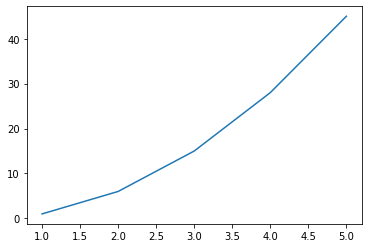

In [17]:
# Visualize the given dataset
plt.plot(x_data,y_data)
plt.show()

In [18]:
# Initialize w2 and w1 with randon values
w_1 = torch.tensor([1.0], requires_grad=True)
w_2 = torch.tensor([1.0], requires_grad=True)

In [19]:
# Quadratic forward pass based on the function above. Taking b as zero for now
def quad_forward(x):
    return w_2*(x**2)+w_1*x

# Loss fucntion as per the defination above
def loss(y_pred,y_actual):
    return (y_pred-y_actual)**2

Calculate $y_{pred}$ for $x=6$ without training the model

In [20]:
y_pred_without_train = quad_forward(6)


Begin Training

In [21]:
# In this method, we learn the dataset multiple times (called epochs)
# Each time, the weight (w) gets updates using the graident decent algorithm based on weights of the previous epoch

alpha = 0.001 # Let us set learning rate as 0.01
weight_list_1 = []
weight_list_2 = []
loss_list=[]

# Training loop
for epoch in range(100):
    total_loss = 0
    count = 0
    
    for x, y in zip(x_data, y_data):
        
        #implement forward pass, compute loss and gradients for the weights and update weights
        ## YOUR CODE STARTS HERE
        y_pred = quad_forward(x)
        current_loss = loss(y_pred, y)
        total_loss += current_loss
        current_loss.backward()
        
        w_1.data = w_1.data - alpha * w_1.grad.item()
        w_2.data = w_2.data - alpha * w_2.grad.item()
        ## YOUR CODE ENDS HERE
        
        # Manually zero the gradients after updating weights
        w_1.grad.data.zero_()
        w_2.grad.data.zero_()
        
        count += 1
        
    avg_mse = total_loss / count        
    print(f"Epoch: {epoch+1} | Loss: {avg_mse.item()} | w_1: {w_1.item()} | w_2: {w_2.item()}")
    weight_list_1.append(w_1)
    weight_list_2.append(w_2)
    loss_list.append(avg_mse)

Epoch: 1 | Loss: 23.789419174194336 | w_1: 1.1494112014770508 | w_2: 1.6618750095367432
Epoch: 2 | Loss: 5.293725967407227 | w_1: 1.1156214475631714 | w_2: 1.5936779975891113
Epoch: 3 | Loss: 4.067604064941406 | w_1: 1.101760745048523 | w_2: 1.6043506860733032
Epoch: 4 | Loss: 4.0941009521484375 | w_1: 1.0858769416809082 | w_2: 1.606476068496704
Epoch: 5 | Loss: 4.023508071899414 | w_1: 1.0703413486480713 | w_2: 1.6095004081726074
Epoch: 6 | Loss: 3.9647536277770996 | w_1: 1.0548969507217407 | w_2: 1.612403392791748
Epoch: 7 | Loss: 3.90571928024292 | w_1: 1.0395704507827759 | w_2: 1.6152952909469604
Epoch: 8 | Loss: 3.8476860523223877 | w_1: 1.0243579149246216 | w_2: 1.6181646585464478
Epoch: 9 | Loss: 3.7905020713806152 | w_1: 1.0092588663101196 | w_2: 1.6210126876831055
Epoch: 10 | Loss: 3.734168291091919 | w_1: 0.9942724704742432 | w_2: 1.6238394975662231
Epoch: 11 | Loss: 3.6786715984344482 | w_1: 0.9793977737426758 | w_2: 1.6266450881958008
Epoch: 12 | Loss: 3.6239993572235107 | 

Calculate $y_{pred}$ for $x=6$ after training the model

In [22]:
y_pred_with_train = quad_forward(6)

print("Actual Y Value for x=4 : 66")
print("Predicted Y Value before training : " , y_pred_without_train.item())
print("Predicted Y Value after training : " , y_pred_with_train.item())

Actual Y Value for x=4 : 66
Predicted Y Value before training :  42.0
Predicted Y Value after training :  65.196533203125
